***
<h1 style='text-align: center;'> MTL782 ASSIGNMENT</h1>


***
## Team Members:
- Name: Sai Kiran Gunnala,     Entry Number: 2020MT60889
- Name: Shiva Kumar Vallala,   Entry Number: 2020MT10848
- Name: Mannepalli Chandra Sekhar,   Entry Number: 2020MT10818

<font size="5">(2) MNIST DIGITS CLASSIFICATION PROBLEM</font>

<font size="4"> Imports</font>

In [1]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


Reading data from "train.csv", which will later be divided into train (to train model) and test (to check accuracy).

In [2]:
data = pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
print("Train Data Shape is: ",data.shape)
data.head()

Train Data Shape is:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Extracting label from data

In [3]:
label = data.label
data=data.drop('label',axis=1)
print("Data Shape: ",data.shape)
print("Label Shape: ",label.shape)

Data Shape:  (42000, 784)
Label Shape:  (42000,)


In [4]:
data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [5]:
unique_values = pd.Series(data.values.flatten()).unique()

print(unique_values)

Converting 1D array to 2D 28x28 array using reshape , to plot and view grayscale images.

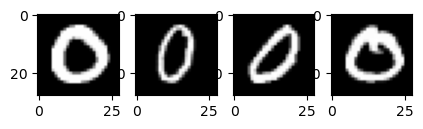

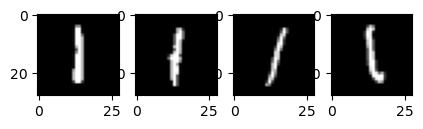

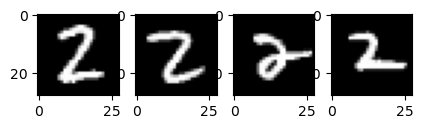

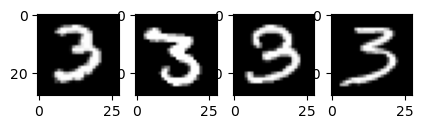

In [6]:
import matplotlib.pyplot as plt, matplotlib.image as mpimg
for x in range(0,4):
    train_0=data[label==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='gray')

Having a look at pixel values frequency (0 to 255) <br>
To get a better idea, lets convert the plot to Log Scale. <br>
Based on leading 0s and 255s we can try converting it to binary in the later steps to simplify the problem. <br>

Text(0, 0.5, 'Frequency')

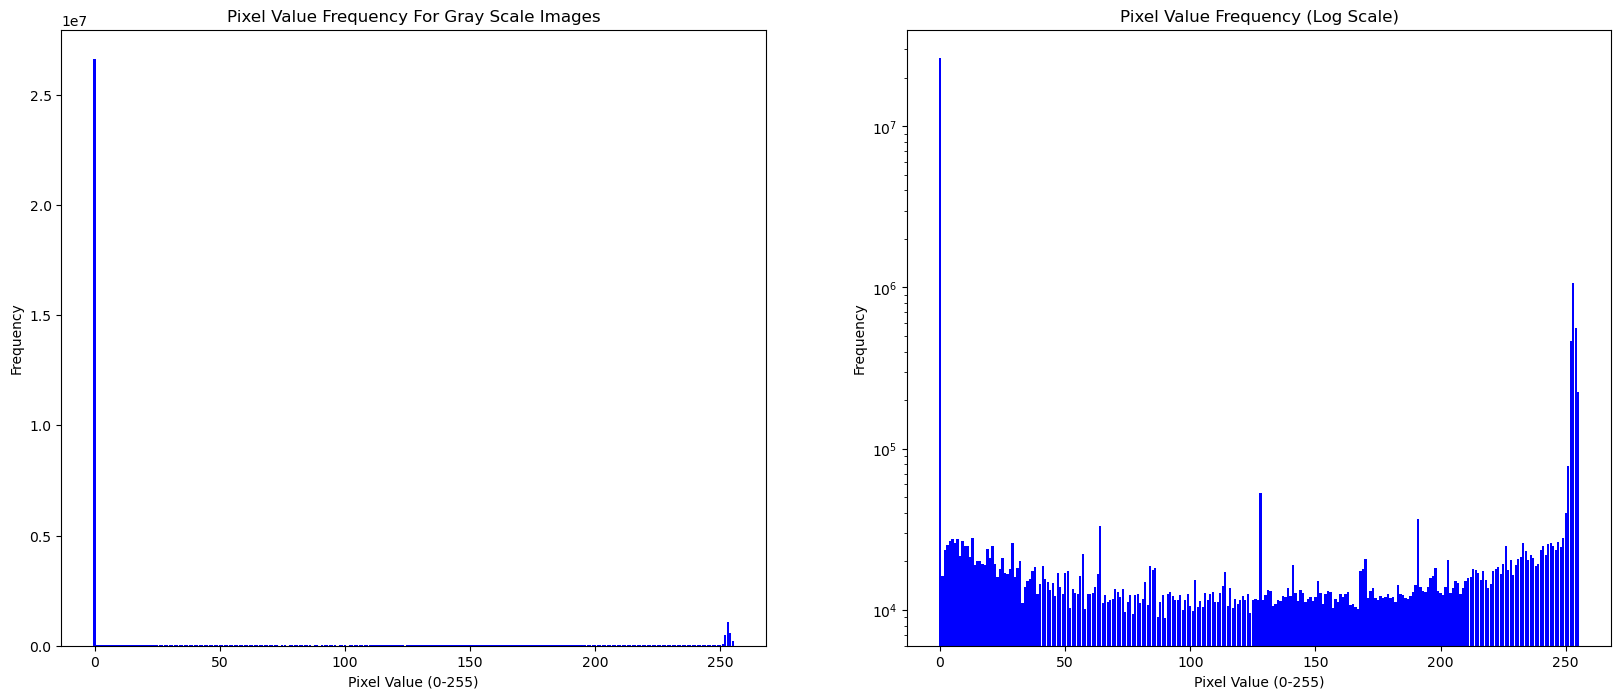

In [7]:
y = pd.value_counts(data.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[20,8])
ax1=plt.subplot(1, 2,1)
ax1.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency For Gray Scale Images')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
#ax1.imshow(data_new[x],cmap='gray')
ax2=plt.subplot(1, 2,2)
ax2.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
#plt.yscale('')

<font size=4> Splitting data into Train and Test Data and Labels </font>

Dividing Data randomly into `train` and `test`. Out of total ***train.csv***. Data, 80% is kept as train for training the model and 20% is kept as test to score the model.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(data, label, train_size=0.8, random_state=42)
print("Train Data Shape: ",X_train.shape)
print("Train Label Shape: ",Y_train.shape)
print("Test Data Shape: ",X_test.shape)
print("Test Label Shape: ",Y_test.shape)

Train Data Shape:  (33600, 784)
Train Label Shape:  (33600,)
Test Data Shape:  (8400, 784)
Test Label Shape:  (8400,)


In [9]:
X_train = X_train.to_numpy().reshape(33600, 784) #(33600, 784)
X_test = X_test.to_numpy().reshape(8400, 784) #(8400, 784)

# X_test = X_test.as_matrix().reshape(28000, 784)

**Data Cleaning**

In [10]:
print(min(X_test[1]), max(X_test[1]))

0 255


As the pixel intensities are currently between the range of 0 and 255, we proceed to normalize the features, using broadcasting. In addition, we proceed to convert our labels from a class vector to binary One Hot Encoded

In [11]:
# Feature Normalization 
X_train = X_train.astype('float32'); 
X_test = X_test.astype('float32'); 
test_data = test_data.astype('float32')
X_train /= 255; 
X_test /= 255;
test_data/= 255

## 2(a) Multi-Class Classification using different models

**Descision Tree**

In [12]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)
predict_x_dt=model_dt.predict(X_test)
predict_dt= model_dt.predict(test_data)

In [13]:
predict_x_dt

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

[9 1 3 1 1 0 0 4 9 7 9 8 8 8 4]


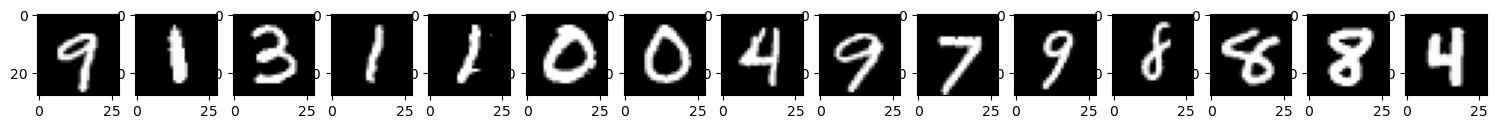

In [14]:
random_rows = data.sample(n=15)
data_new=[]
random_rows = random_rows.astype('float32');
random_rows /= 255; 
for idx in random_rows.index:
    val=random_rows.loc[idx].values.reshape(28,28)
    data_new.append(val)
plt.figure(figsize=(25,25))   
for x in range(0,15):
    ax1=plt.subplot(1, 20, x+1)
    ax1.imshow(data_new[x],cmap='gray')
predict_random=model_dt.predict(random_rows)
print(predict_random)

**Random Forest**

In [15]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=50)
model_rf.fit(X_train,Y_train)
predict_x_rf=model_rf.predict(X_test)
predict_rf=model_rf.predict(test_data)

In [16]:
predict_x_rf

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

[3 5 9 2 0 9 1 7 0 8 9 0 5 6 6]


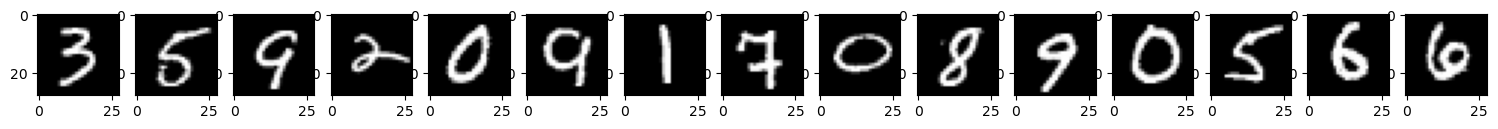

In [17]:
random_rows = data.sample(n=15)
data_new=[]
random_rows = random_rows.astype('float32');
random_rows /= 255; 
for idx in random_rows.index:
    val=random_rows.loc[idx].values.reshape(28,28)
    data_new.append(val)
plt.figure(figsize=(25,25))   
for x in range(0,15):
    ax1=plt.subplot(1, 20, x+1)
    ax1.imshow(data_new[x],cmap='gray')
predict_random=model_rf.predict(random_rows)
print(predict_random)

**KNN Classifier**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train,Y_train)
predict_x_knn=model_knn.predict(X_test)
predict_knn=model_knn.predict(test_data)

In [19]:
predict_x_knn

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

[9 3 7 6 1 0 4 9 2 3 3 1 8 8 2]


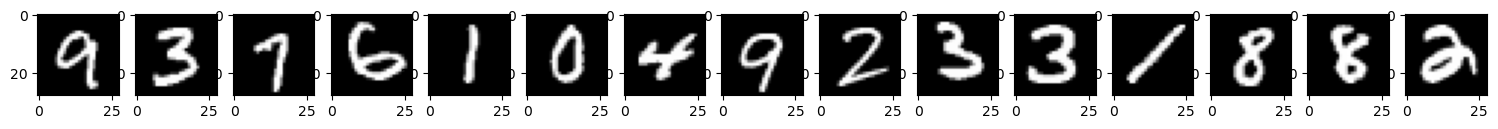

In [20]:
random_rows = data.sample(n=15)
data_new=[]
random_rows = random_rows.astype('float32');
random_rows /= 255; 
for idx in random_rows.index:
    val=random_rows.loc[idx].values.reshape(28,28)
    data_new.append(val)
plt.figure(figsize=(25,25))   
for x in range(0,15):
    ax1=plt.subplot(1, 20, x+1)
    ax1.imshow(data_new[x],cmap='gray')
predict_random=model_knn.predict(random_rows)
print(predict_random)

**SVM Classifier**

In [21]:
from sklearn import svm
model_svm= svm.SVC(gamma='scale',class_weight='balanced',C=30)
model_svm.fit(X_train,Y_train)
predict_x_svm=model_svm.predict(X_test)
predict_svm=model_svm.predict(test_data)

In [22]:
predict_x_svm

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

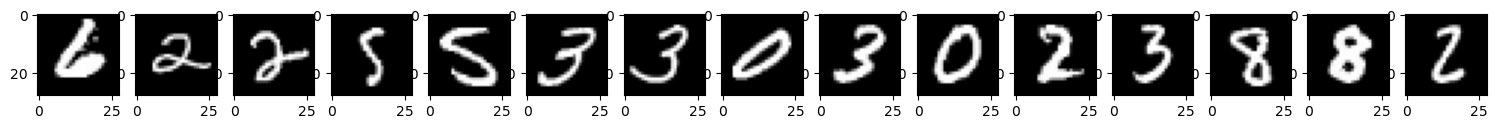

In [23]:
random_rows = data.sample(n=15)
data_new=[]
random_rows = random_rows.astype('float32');
random_rows /= 255; 
for idx in random_rows.index:
    val=random_rows.loc[idx].values.reshape(28,28)
    data_new.append(val)
plt.figure(figsize=(25,25))   
for x in range(0,15):
    ax1=plt.subplot(1, 20, x+1)
    ax1.imshow(data_new[x],cmap='gray')
predict_random=model_svm.predict(random_rows)

In [24]:
print(predict_random)

[6 2 2 5 5 3 3 0 3 0 2 3 8 8 2]


 **ANN Classifier Model**

In [25]:
from sklearn.neural_network import MLPClassifier
model_ann = MLPClassifier()
model_ann.fit(X_train, Y_train)
predict_x_ann=model_ann.predict(X_test)
predict_ann=model_ann.predict(test_data)

In [26]:
predict_x_ann

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

[8 4 5 0 5 9 3 4 3 7 6 0 0 6 2]


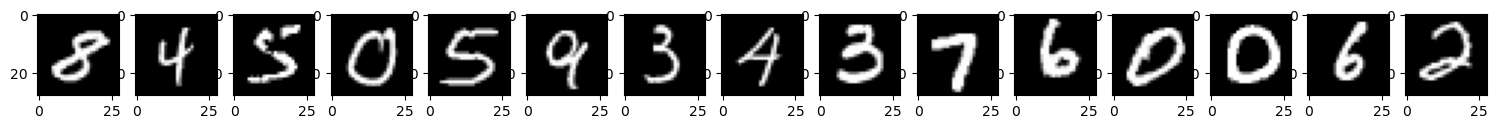

In [27]:
random_rows = data.sample(n=15)
data_new=[]
random_rows = random_rows.astype('float32');
random_rows /= 255; 
for idx in random_rows.index:
    val=random_rows.loc[idx].values.reshape(28,28)
    data_new.append(val)
plt.figure(figsize=(25,25))   
for x in range(0,15):
    ax1=plt.subplot(1, 20, x+1)
    ax1.imshow(data_new[x],cmap='gray')
predict_random=model_ann.predict(random_rows)
print(predict_random)

**Naive Bayes Classification Model**

In [28]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(X_train, Y_train)
predict_x_nb=model_nb.predict(X_test)
predict_nb=model_nb.predict(test_data)

In [29]:
predict_x_nb

array([1, 1, 9, ..., 3, 0, 9], dtype=int64)

[0 7 3 9 9 9 3 8 8 0 9 6 6 1 1]


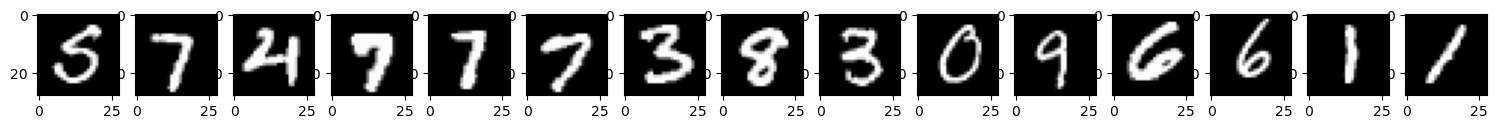

In [30]:
random_rows = data.sample(n=15)
data_new=[]
random_rows = random_rows.astype('float32');
random_rows /= 255; 
for idx in random_rows.index:
    val=random_rows.loc[idx].values.reshape(28,28)
    data_new.append(val)
plt.figure(figsize=(25,25))   
for x in range(0,15):
    ax1=plt.subplot(1, 20, x+1)
    ax1.imshow(data_new[x],cmap='gray')
predict_random=model_nb.predict(random_rows)
print(predict_random)

## 2(b)Exploration of Different Evaluation Metrics

<font size=4> **Using Accuracy score and Classification report**</font>

In [31]:
from sklearn.metrics import accuracy_score,classification_report
# Descicion tree
print('Accuracy of Desciosion Tree :',accuracy_score(Y_test,predict_x_dt))
print(classification_report(Y_test,predict_x_dt))

#Random Forest
print('Accuracy of Random Forest :',accuracy_score(Y_test,predict_x_rf))
print(classification_report(Y_test,predict_x_rf))

# K Nearest Neighbor Classifier
print('Accuracy of KNN Classifier :',accuracy_score(Y_test,predict_x_knn))
print(classification_report(Y_test,predict_x_knn))

# SVM Classifier
print('Accuracy of SVM Classifier :',accuracy_score(Y_test,predict_x_svm))
print(classification_report(Y_test,predict_x_svm))

# ANN Classifier
print('Accuracy of ANN Classifier :',accuracy_score(Y_test,predict_x_ann))
print(classification_report(Y_test,predict_x_ann))

# Naive Bayes Classifier
print('Accuracy of Naive Bayes Classifier :',accuracy_score(Y_test,predict_x_nb))
print(classification_report(Y_test,predict_x_nb))

Accuracy of Desciosion Tree : 0.8529761904761904
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       816
           1       0.92      0.95      0.93       909
           2       0.83      0.82      0.82       846
           3       0.84      0.81      0.83       937
           4       0.85      0.85      0.85       839
           5       0.78      0.80      0.79       702
           6       0.88      0.87      0.88       785
           7       0.90      0.88      0.89       893
           8       0.78      0.79      0.79       835
           9       0.83      0.84      0.83       838

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400

Accuracy of Random Forest : 0.9596428571428571
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99   

<font size=4> **Using Confusion Matrix**</font>

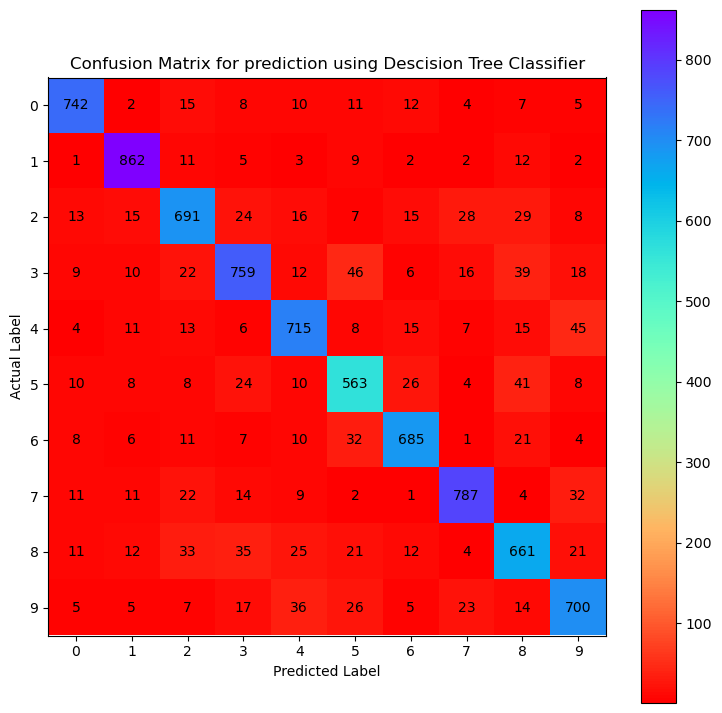

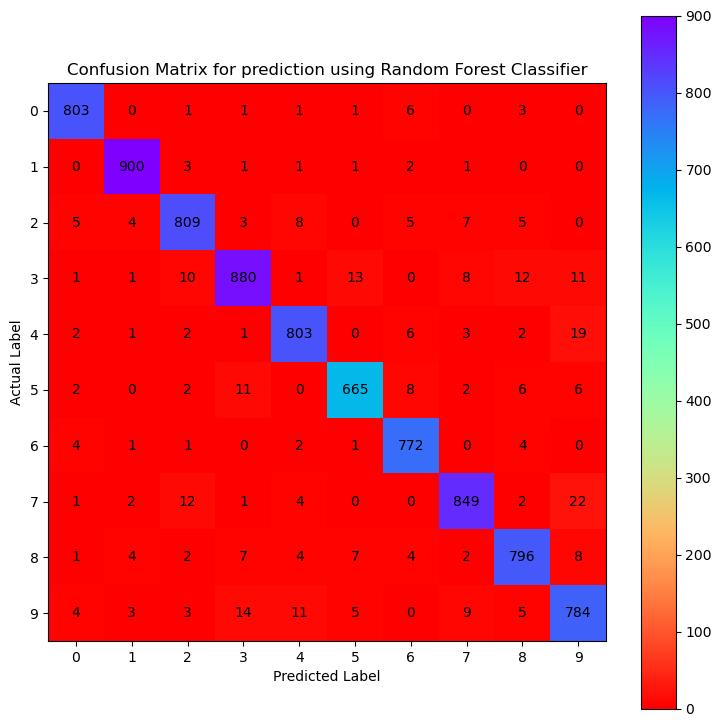

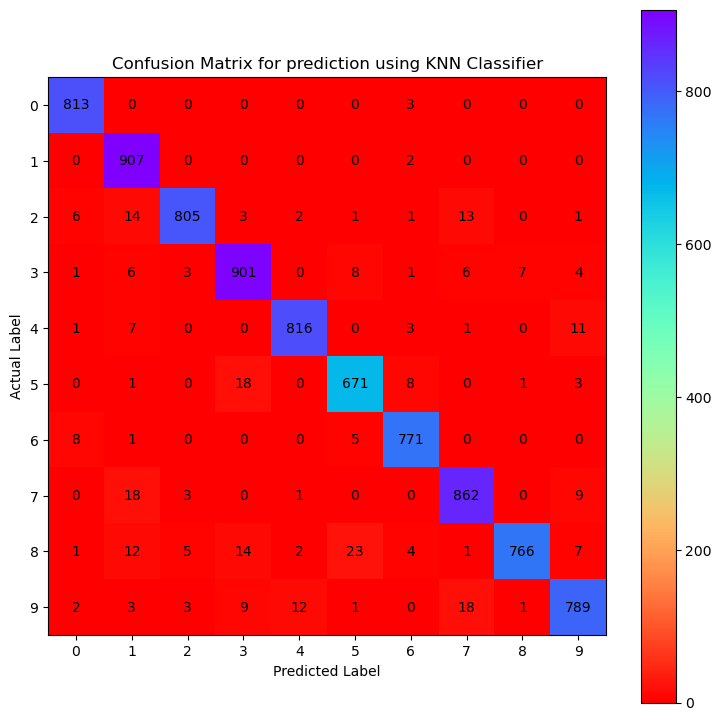

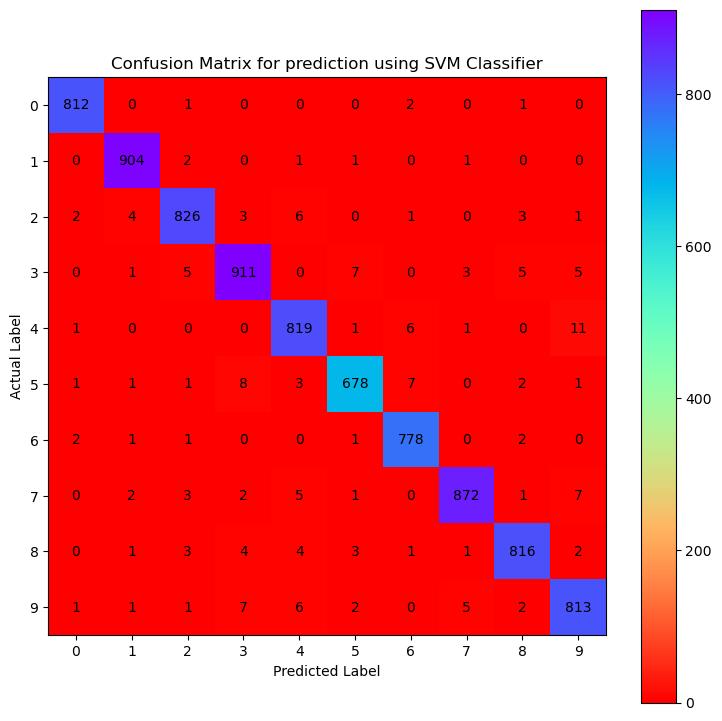

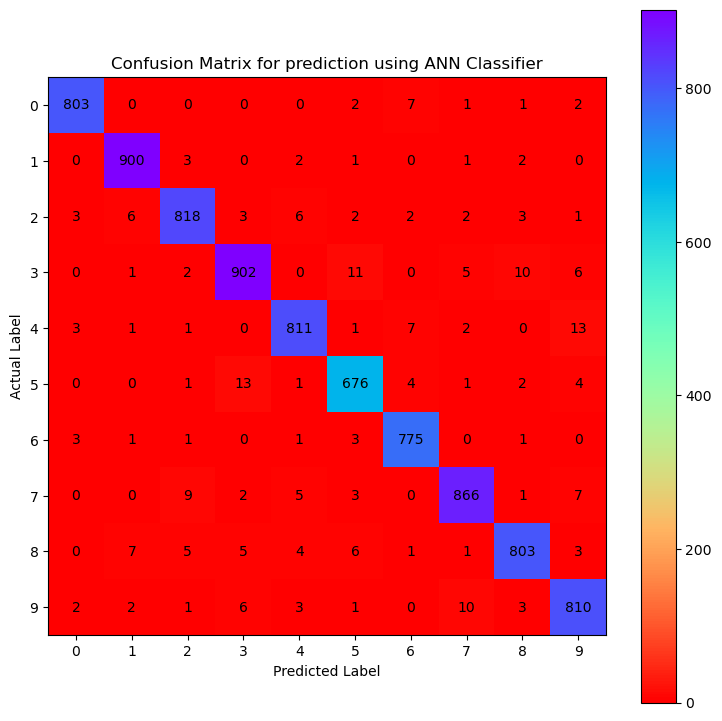

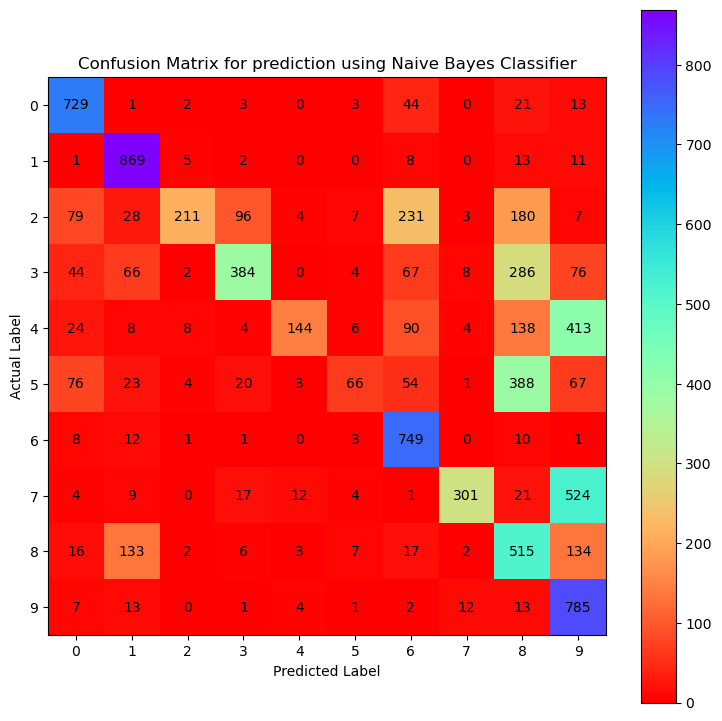

In [32]:
from sklearn import metrics
def conf_mat(cm,model_name):
    plt.figure(figsize=(9,9))
    plt.imshow(cm,cmap='rainbow_r')
    plt.title("Confusion Matrix for prediction using "+model_name)
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.colorbar()
    width,height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
    plt.show()

    
cm= metrics.confusion_matrix(Y_test,predict_x_dt) # descision tree
conf_mat(cm,"Descision Tree Classifier")

cm= metrics.confusion_matrix(Y_test,predict_x_rf) # random forest
conf_mat(cm,"Random Forest Classifier")

cm= metrics.confusion_matrix(Y_test,predict_x_knn) # KNN Classifier
conf_mat(cm,"KNN Classifier")

cm= metrics.confusion_matrix(Y_test,predict_x_svm) # SVM Classifier
conf_mat(cm,"SVM Classifier")

cm= metrics.confusion_matrix(Y_test,predict_x_ann) # ANN Classifier
conf_mat(cm,"ANN Classifier")

cm= metrics.confusion_matrix(Y_test,predict_x_nb) # Naive Bayes Classifier
conf_mat(cm,"Naive Bayes Classifier")

## **Parameter Tuning using Grid Search CV**

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
Y_digits=digits.target
X_digits=digits.data
X_digits/=255

(1797, 64)


In [34]:
#Descision Tree
dt_classifier = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 40,50],
    'min_samples_split': [1,2,3,4],
    'min_samples_leaf': [1, 2,3, 4]
}
# Create grid search object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, verbose=0)
grid_search.fit(X_digits, Y_digits)    # Fit the grid search object to the data
# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best accuracy score: 0.8213819251005882


In [35]:
## Random Forest Classifier

rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [ 2, 4],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_digits, Y_digits)    # Fit the GridSearchCV object to the data

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy score: 0.9399241720829465


In [36]:
#KNN Classifier

knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_digits, Y_digits)  # Fit the GridSearchCV object to the data

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best accuracy score: 0.966621788919839


In [37]:
## SVM Classifier

svm_classifier = svm.SVC()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(range(1, 10))
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_digits, Y_digits) # Fit the GridSearchCV object to the data

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy score: 0.9738502011761063


In [39]:
## ANN Classifier

#Define the MLPClassifier object
mlp = MLPClassifier(max_iter=100)

# Define the hyperparameters to be tuned using GridSearchCV
param_grid = {'hidden_layer_sizes': [(10,), (50,), (10, 10)],
              'activation': ['logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [  0.1, 1]}

# Define the Grid Search CV object
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5)

# Fit the Grid Search CV object on the data
grid_search.fit(X_digits, Y_digits)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}
Best Score:  0.9260074280408542


**No Parameter tuning for Naive Bayes because it has no parameters**

## **Parameter Tuning using Random Search CV**

In [40]:
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint

In [41]:
## Descision Tree

# Create a decision tree classifier object
dtc = DecisionTreeClassifier()

# Define the hyperparameters to be tuned using RandomizedSearchCV
param_dist = {'criterion': ['gini', 'entropy'],
              'max_depth': randint(2, 10),
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 10)}

# Define the Randomized Search CV object
random_search = RandomizedSearchCV(estimator=dtc, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)

# Fit the Randomized Search CV object on the data
random_search.fit(X_digits, Y_digits)

# Print the best parameters and the best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 4}
Best Score:  0.7763246672856701


In [42]:
## Random Forest

# Create a random forest classifier object
rfc = RandomForestClassifier()

# Define the hyperparameters to be tuned using RandomizedSearchCV
param_dist = {'n_estimators': randint(50, 200),
              'max_depth': randint(2, 10),
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 10),
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

# Define the Randomized Search CV object
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)

# Fit the Randomized Search CV object on the data
random_search.fit(X_digits, Y_digits)

# Print the best parameters and the best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 58}
Best Score:  0.9243392138656763


In [43]:
## KNN Classifier

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Define the hyperparameters to be tuned using RandomizedSearchCV
param_dist = {'n_neighbors': randint(1, 10),
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Define the Randomized Search CV object
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)

# Fit the Randomized Search CV object on the data
random_search.fit(X_digits, Y_digits)

# Print the best parameters and the best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Best Score:  0.9627236149798823


In [44]:
## SVM Classifier

from scipy.stats import uniform
# Create a SVM classifier object
svc = svm.SVC()

# Define the hyperparameters to be tuned using RandomizedSearchCV
param_dist = {'C': uniform(loc=0, scale=10),
              'gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=10).rvs(10))}

# Define the Randomized Search CV object
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)

# Fit the Randomized Search CV object on the data
random_search.fit(X_digits, Y_digits)

# Print the best parameters and the best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'C': 7.796910002727692, 'gamma': 6.85842954649973}
Best Score:  0.9616140513772825


In [45]:
## ANN Classifier

#Define the MLPClassifier object
mlp = MLPClassifier(max_iter=100)

# Define the hyperparameters to be tuned using GridSearchCV
param_grid = {'hidden_layer_sizes': [(10,), (10, 10)],
              'activation': ['logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [  0.1, 1]}

# Define the Grid Search CV object
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5)

# Fit the Grid Search CV object on the data
grid_search.fit(X_digits, Y_digits)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}
Best Score:  0.919885484370164
